# Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Importing the Dataset

In [3]:
dataset = pd.read_csv('creditcard.csv')

In [4]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# Dataset Information

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Checking Distribution of Legit and fraudulent transactions.

In [9]:
dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
#Highly Unbalanced Dataset

In [12]:
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]

In [13]:
print(legit.shape)

(284315, 31)


In [14]:
print(fraud.shape)

(492, 31)


In [15]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Comparing the Values for both transactions

In [19]:
dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Dealing with Unbalanced Data

In [20]:
#Under-Sampling

In [21]:
legit_sample = legit.sample(n=492)

In [22]:
#Concatenating two Dataframes

In [23]:
new_dataset = pd.concat([legit_sample, fraud], axis = 0)

In [24]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
25888,33811.0,1.083850,-0.110376,0.488725,1.055183,-0.365781,0.247487,-0.409230,0.297759,0.239310,...,0.224206,0.534459,-0.154627,-0.335706,0.481992,-0.186409,0.028029,0.012352,38.80,0
15025,26359.0,-1.112030,-0.292895,3.326344,1.274944,-0.381600,3.245994,-1.088477,1.311048,0.976117,...,0.338778,1.394652,-0.150219,-0.982591,0.046482,0.148807,0.216005,0.074672,57.04,0
271534,164619.0,1.937909,-0.291381,-1.418621,-0.005448,0.772338,0.908070,-0.196313,0.297322,0.377805,...,-0.203569,-0.397489,0.339281,-1.642520,-0.471915,0.311480,-0.028074,-0.088283,0.89,0
75795,56254.0,1.329002,-1.217712,0.527786,-1.541655,-1.292411,0.108374,-1.132954,0.069153,-2.112667,...,-0.266848,-0.507008,0.095654,-0.328243,0.079356,-0.386677,0.049804,0.024764,70.65,0
270546,164132.0,2.086013,0.051838,-2.060006,0.089945,0.904528,0.025046,0.025154,0.012610,0.345488,...,-0.369287,-0.998993,0.229600,-0.461344,-0.197052,0.215226,-0.066662,-0.050957,1.29,0


In [25]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [27]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97798.810976,-0.115048,0.060805,0.011209,-0.064447,-0.002387,0.149196,-0.009019,-0.069114,-0.069969,...,0.000511,-0.044195,-0.018036,-0.033211,-0.066386,-0.016477,0.003239,0.021988,0.014165,95.789451
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Splitting the data into features and targets.

In [28]:
X = new_dataset.drop(columns='Class', axis = 1)
y = new_dataset['Class']

In [29]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
25888    33811.0  1.083850 -0.110376  0.488725  1.055183 -0.365781  0.247487   
15025    26359.0 -1.112030 -0.292895  3.326344  1.274944 -0.381600  3.245994   
271534  164619.0  1.937909 -0.291381 -1.418621 -0.005448  0.772338  0.908070   
75795    56254.0  1.329002 -1.217712  0.527786 -1.541655 -1.292411  0.108374   
270546  164132.0  2.086013  0.051838 -2.060006  0.089945  0.904528  0.025046   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [30]:
print(y)

25888     0
15025     0
271534    0
75795     0
270546    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


# Splitting data into training and testing Data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Training the Model

In [34]:
#Using the Liner Regression Model as its a binary classification problem.

In [35]:
regressor = LogisticRegression()

In [36]:
regressor.fit(X_train, y_train)

LogisticRegression()

# Model Evaluation

In [37]:
#Testing accuracy on Training Data

In [38]:
X_train_pred = regressor.predict(X_train)
training_data_acc = accuracy_score(X_train_pred, y_train)

In [39]:
print('Accuracy on Training data :', training_data_acc)

Accuracy on Training data : 0.9453621346886912


In [40]:
#Testing accuracy on Test Data

In [47]:
X_test_pred = regressor.predict(X_test)
test_data_acc = accuracy_score(X_test_pred, y_test)

In [48]:
print('Accuracy on Test data :', test_data_acc)

Accuracy on Test data : 0.9289340101522843


# Visualizations:

# 1. Feature Distribution by Class

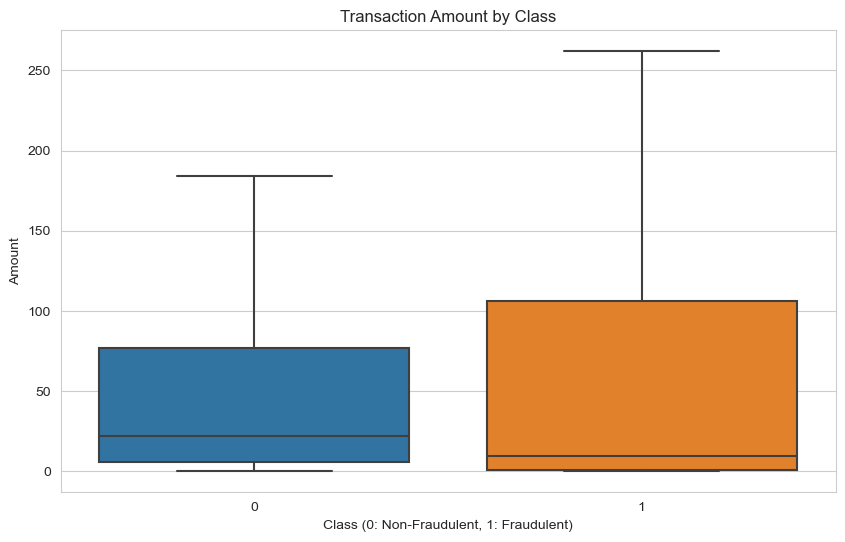

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Boxplot for transaction amount by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=dataset, showfliers=False)  # `showfliers=False` to hide outliers for better visibility
plt.title('Transaction Amount by Class')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Amount')
plt.show()


# 2. Correlation Heatmap:

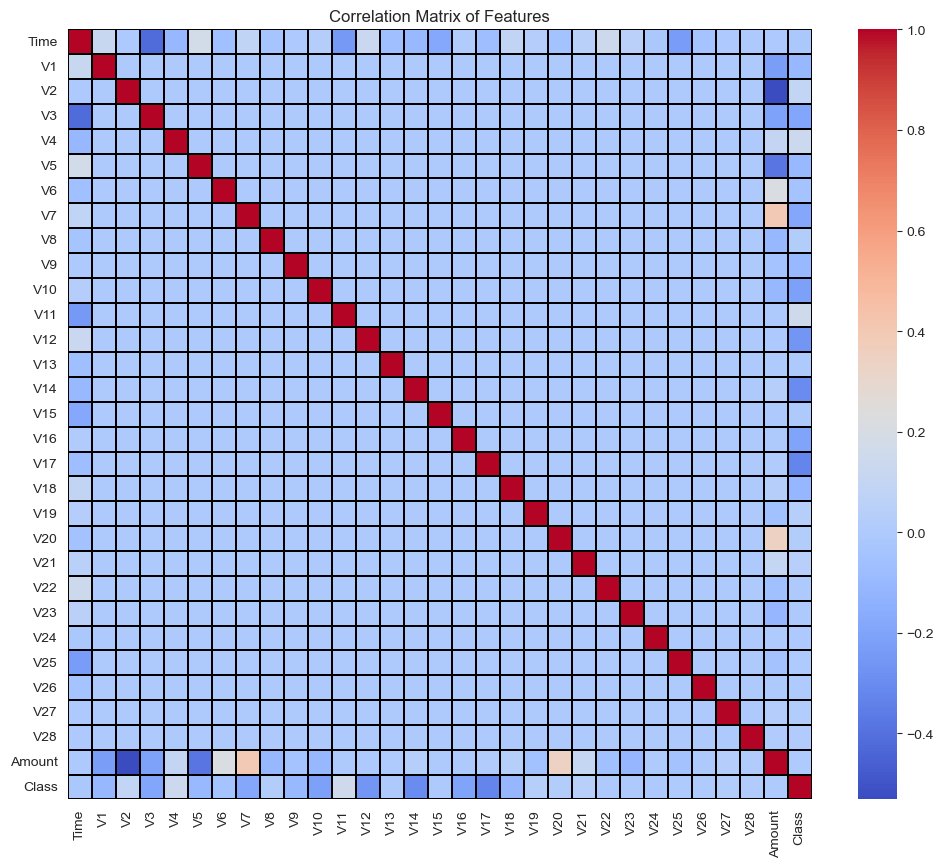

In [50]:
# Calculating the correlation matrix
corr = dataset.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.1, linecolor='black', fmt=".1f", annot_kws={'size':8})
plt.title('Correlation Matrix of Features')
plt.show()


# 3. Time Series Analysis of Transactions:

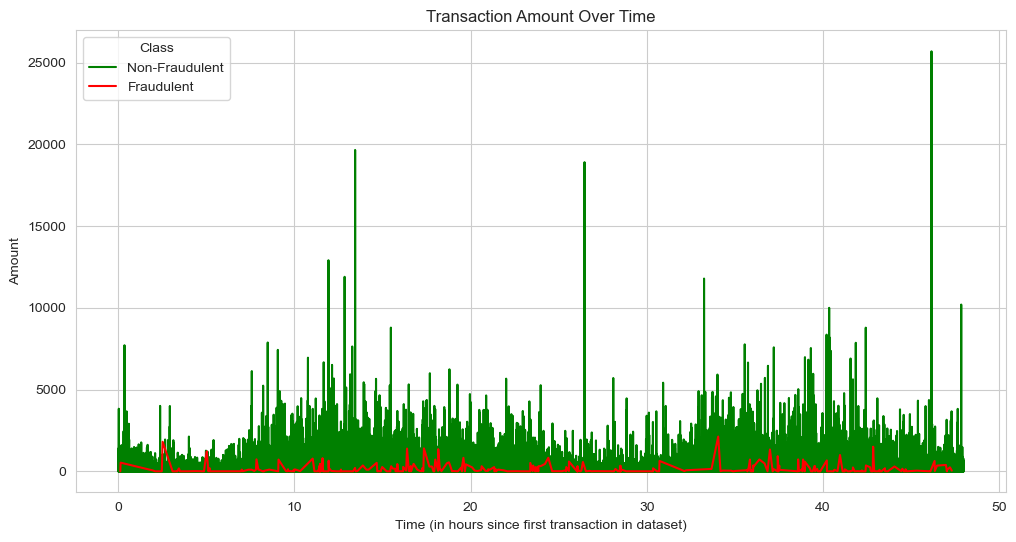

In [51]:
# Convert 'Time' from seconds to hours to make it more interpretable
dataset['Time'] = dataset['Time'] / 3600

# Plotting transactions over time by class
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Amount', hue='Class', data=dataset, estimator=None, palette=['g', 'r'])
plt.title('Transaction Amount Over Time')
plt.xlabel('Time (in hours since first transaction in dataset)')
plt.ylabel('Amount')
plt.legend(title='Class', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()
